<a href="https://colab.research.google.com/github/tsanifaishal/MachineLearningTasks/blob/main/9thWeekTasks/Task_9_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : M Tsani Faishal Azhar

NIM : 1103210143

Judul Tugas : Lecture 9, model Neural Network, dataset housepricedata.csv

Prompt : Beri kode untuk menghubungkan google colab dan google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Prompt : beri kode untuk membaca dataset menjadi dataframe dari google drive

In [2]:
import pandas as pd

# Tentukan path file di Google Drive
file_path = '/content/drive/MyDrive/Dataset/housepricedata.csv'

# Baca dataset menjadi DataFrame
data = pd.read_csv(file_path)

#Menampilkan informasi atau contoh data dari DataFrame
print(data.head())
data.info()

   LotArea  OverallQual  OverallCond  TotalBsmtSF  FullBath  HalfBath  \
0     8450            7            5          856         2         1   
1     9600            6            8         1262         2         0   
2    11250            7            5          920         2         1   
3     9550            7            5          756         1         0   
4    14260            8            5         1145         2         1   

   BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageArea  AboveMedianPrice  
0             3             8           0         548                 1  
1             3             6           1         460                 1  
2             3             6           1         608                 1  
3             3             7           1         642                 0  
4             4             9           1         836                 1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Colum

Prompt : Give the code to create nerual netwrok model, with following specification::
- set AboveMedianPrice as target column, the other as feature columns
- preprocess data using normalization [0,1] for all the feature column
- Split the data into 70% data train, 30% for data validation and test
- Split into 50% data test and data validation of the 30% of data validation and test
- Create NN as thes architecture:
Dense(32, activation='relu', input_shape=(10,)),
Dense(32, activation='relu'),
Dense(1, activation='sigmoid')
-Set this architecture:
optimizer='sgd',
loss='binary_crossentropy'
metrics=['accuracy'}]
-batch_size=32, epochs=100


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Set the target column and feature columns
target_column = 'AboveMedianPrice'
X = data.drop(columns=[target_column])
y = data[target_column]

# Normalize the feature columns using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into 70% training and 30% validation and test
X_train, X_val_test, y_train, y_val_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Further split the validation and test data into 50% validation and 50% test
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Create the neural network model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    batch_size=32,
                    epochs=100)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Epoch 1/100
32/32 [==============================] - 1s 10ms/step - loss: 0.6898 - accuracy: 0.5117 - val_loss: 0.6820 - val_accuracy: 0.5160
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6836 - accuracy: 0.5127 - val_loss: 0.6761 - val_accuracy: 0.5251
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6779 - accuracy: 0.5166 - val_loss: 0.6704 - val_accuracy: 0.5434
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6725 - accuracy: 0.5186 - val_loss: 0.6645 - val_accuracy: 0.5479
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6668 - accuracy: 0.5362 - val_loss: 0.6582 - val_accuracy: 0.5616
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6611 - accuracy: 0.5323 - val_loss: 0.6519 - val_accuracy: 0.5799
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6556 - accuracy: 0.5910 - val_loss: 0.6457 - val_accuracy: 0.6210
Epoch 8/100



Kode tersebut memuat data dari file CSV dan memisahkan kolom target (AboveMedianPrice) dari fitur-fitur lainnya. Fitur-fitur ini kemudian dinormalisasi ke rentang [0,1] menggunakan MinMaxScaler. Setelah itu, data dibagi menjadi 70% untuk pelatihan dan 30% untuk validasi dan pengujian. Dari 30% tersebut, data kembali dibagi menjadi 50% untuk validasi dan 50% untuk pengujian. Sebuah model jaringan saraf (neural network) dibuat dengan dua lapisan tersembunyi masing-masing 32 neuron dengan aktivasi ReLU, dan satu lapisan keluaran dengan satu neuron dan aktivasi sigmoid. Model ini dikompilasi menggunakan optimizer SGD, loss function binary cross-entropy, dan metrik akurasi. Model dilatih selama 100 epoch dengan batch size 32, kemudian dievaluasi pada data pengujian, dengan hasil loss dan akurasi dicetak ke layar.

Prompt : Give code for visualitation this NN

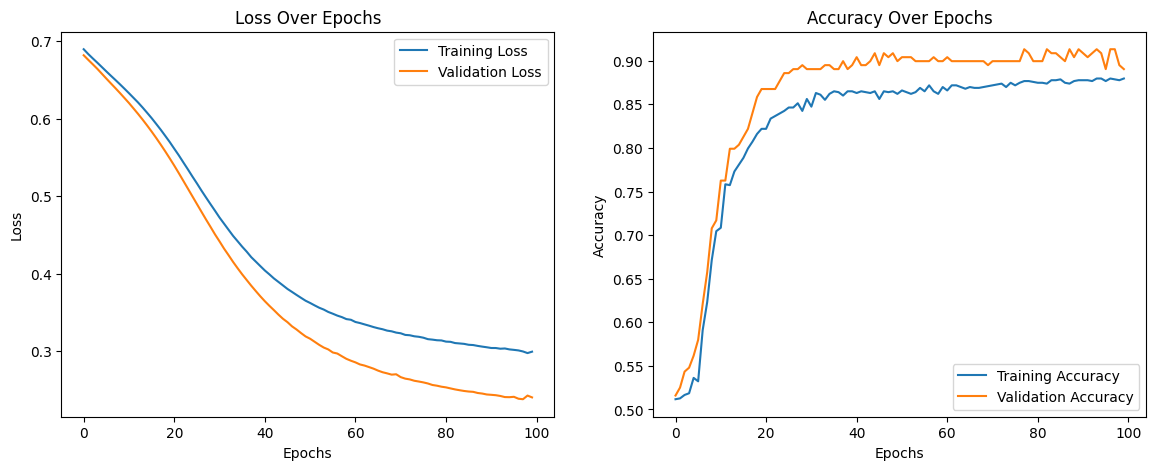

In [4]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Kode tersebut menggunakan Matplotlib untuk memvisualisasikan proses pelatihan jaringan saraf tiruan. Pertama, sebuah figura (kanvas) dibuat dengan ukuran 14x5 inci. Kode kemudian membuat dua subplot yang ditempatkan berdampingan. Subplot pertama menggambarkan kurva loss (kerugian) selama epoch pelatihan, dengan satu kurva untuk training loss dan satu lagi untuk validation loss, dilabeli dan diberi legenda. Subplot kedua menggambarkan kurva akurasi selama epoch pelatihan, dengan kurva untuk training accuracy dan validation accuracy, juga dilabeli dan diberi legenda. Judul, label sumbu, dan legenda ditambahkan untuk memudahkan interpretasi. Akhirnya, plt.show() digunakan untuk menampilkan grafik ini pada layar, memberikan visualisasi yang jelas tentang bagaimana loss dan akurasi berubah selama pelatihan.






